## MIE424 (2026 Winter) Lab 3

In this lab, you will be implementing the perceptron algorithm.

### Load Necessary Libraries

In [1]:
import math
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import cm
from matplotlib.colors import ListedColormap, LinearSegmentedColormap
from typing import Tuple, Optional

%matplotlib inline
%config InlineBackend.figure_format='retina'
plt.rcParams["figure.figsize"] = (5,5)

### Generate Dataset

Here, we generate an arbitrary dataset with 2-dimensional features. $X$ is generated by using `np.random.random` (which returns random floats in the half-open interval `[0.0, 1.0)`). Then $Y$ is computed with the assumed true boundary $Xw=0$.

In [2]:
# helper function: generating the data
# n_sample: number of samples to be generated
# w: true decision boundary
def generate_data_2class(n_sample: int, w: np.ndarray):
    X = np.random.random((n_sample, 2))
    Y = np.sign(np.matmul(X, w))
    check = np.sum(Y == 1) * np.sum(Y==-1)
    if check == 0:
        print("w given not valid; there's only one class")
        return None
    return X, Y

# helper function: return the slope and bias
def get_dec_boundary(w: np.ndarray) -> Tuple[float, float]:
    """
    Given a 2-dim or 3-dim w vector, returns the slope and the bias of the line.
    """
    assert w.shape == (2, 1) or w.shape == (3, 1)
    if w.shape[0] == 2:
        return -float(w[0]/w[1]), 0.
    else:
        return -float(w[0]/w[1]), -float(w[2]/w[1])

# helper function: plots a line given its slope and bias
def plot_boundary(slope: float, bias: float = 0.0):
    bias = float(bias)
    plt.plot([0, (1 - bias) / slope], [bias, 1])
    plt.xlim(0, 1)
    plt.ylim(0, 1)

Since all components in $X$ are between [0,1], we need to have different signs in two components of vector $w$ if we want to have both classes with the boundary $Xw=0$.

In [3]:
# true value of w used in generating the dataset
w_true = np.array([0.424, -0.2023]).reshape(2, 1)

# Generate the dataset
np.random.seed(2023)
X, Y = generate_data_2class(100, w_true)

w_true

array([[ 0.424 ],
       [-0.2023]])

/tmp/ipython-input-4214274590.py:20: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  return -float(w[0]/w[1]), 0.
/tmp/ipython-input-2935585034.py:4: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed in 3.11. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap()`` or ``pyplot.get_cmap()`` instead.
  colors = cm.get_cmap('cool', 2)


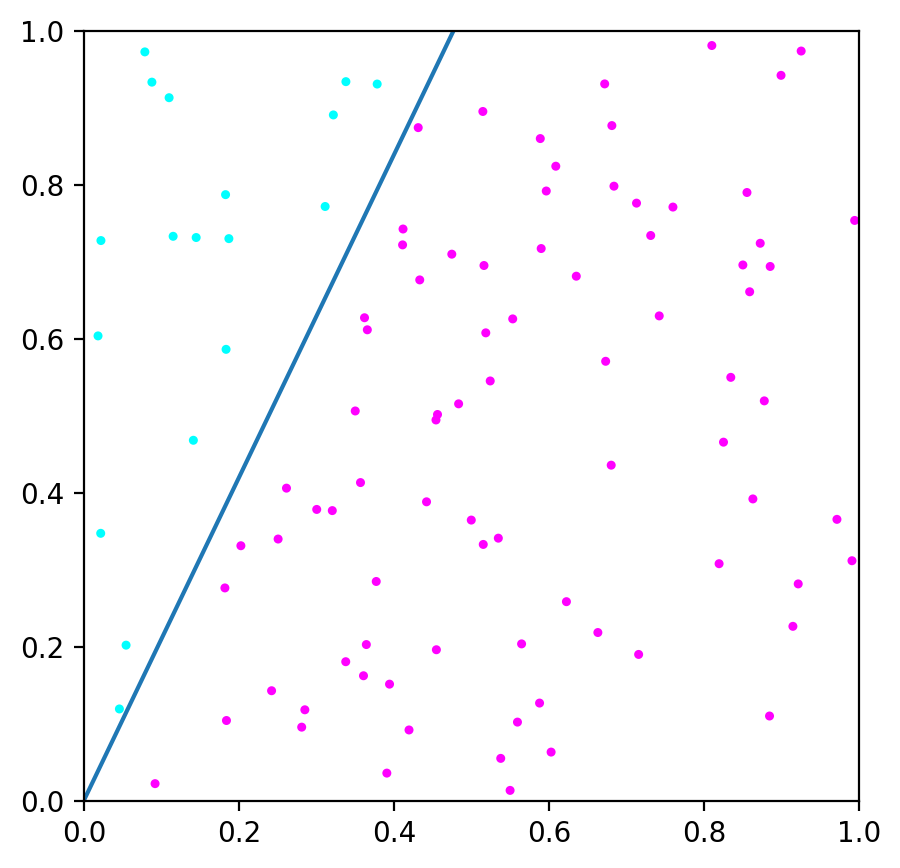

In [ ]:
true_slope, _ = get_dec_boundary(w_true)

# Create colormap and plot
colors = cm.get_cmap('cool', 2)
plt.scatter(X[:, 0], X[:, 1], c=colors(Y), s=5)
plot_boundary(true_slope)
plt.show()

### Construct and Train Preceptron Model

Recall the preceptron model:

We have a set of points $S = \{X_1, X_2, \cdots, X_n\},X_i\in\mathbb{R}^d$. The points are coming as a stream, and each $X_i$ is associated with a label $Y_i$ (1 or −1).

We assume the points are separable, i.e., there exists a linear classifier that can correctly classify all points. We are looking to find this classifier.

Once working through a model with no intercept, we will generalize this and include an intercept term. That is, we will assume there is a given dimension $(d+1)$ for which $X_{i,d+1} = 1$ for all $i$.

The Perceptron Algorithm

- Initialization: $w_0$ = 0
- for each point $x_j\in X$
    - if $x_j^\top w_k>0$ predict $y_j =1$; else predict $y_j =−1$
    - if we make a mistake
        - if true label is +1, update $w_{k+1} = w_k + x_j$
        - if true label is −1, update $w_{k+1} = w_k - x_j$

In [5]:
w_test = np.array([0.124, -0.6023]).reshape(2, 1)
test_slope, _ = get_dec_boundary(w_test)

# Create colormap and plot
colors = cm.get_cmap('cool', 2)
plt.scatter(X[:, 0], X[:, 1], c=colors(Y), s=5)
plot_boundary(test_slope)
plt.show()


TypeError: only 0-dimensional arrays can be converted to Python scalars

In [ ]:
# point (0.6, 0.5) is misclassified
x_test = np.array([0.6, 0.5])
current_sign = np.matmul(x_test, w_test)
true_sign = np.matmul(x_test, w_true)
print(f"current_sign: {current_sign}")
print(f"true_sign: {true_sign}")

current_sign: [-0.22675]
true_sign: [0.15325]


In [ ]:
# update boundary
w_test = np.array([0.124, -0.6023]).reshape(2, 1) + np.array([0.6, 0.5]).reshape(2, 1)
w_test

array([[ 0.724 ],
       [-0.1023]])

/tmp/ipython-input-4214274590.py:20: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  return -float(w[0]/w[1]), 0.
/tmp/ipython-input-950162132.py:4: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed in 3.11. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap()`` or ``pyplot.get_cmap()`` instead.
  colors = cm.get_cmap('cool', 2)


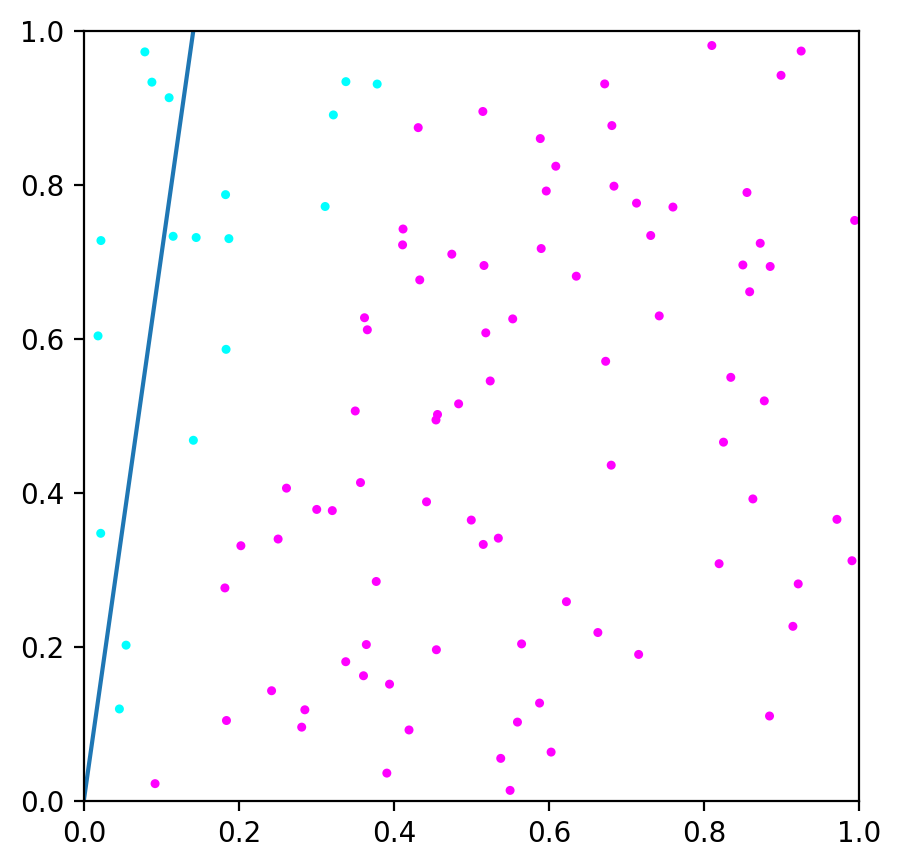

In [ ]:
test_slope, _ = get_dec_boundary(w_test)

# Create colormap and plot
colors = cm.get_cmap('cool', 2)
plt.scatter(X[:, 0], X[:, 1], c=colors(Y), s=5)
plot_boundary(test_slope)
plt.show()

In [ ]:
class Perceptron:

    def __init__(self, iterations: int):
        self.w = np.zeros((2, 1), dtype=float)
        #self.w = np.random.random((2, 1))
        self.iterations = iterations
        self.num_updates = 0

    def train(
            self, X, Y, lr: float = 1.0, plot: bool = False, plot_period: int = 1, verbose: bool = True
    ) -> None:
        for itr in range(self.iterations):

            for i in range(len(X)):
                ######################################
                # Insert your code here
                # Update w using the preceptron algorithm:
                # Hint: you can use self.w to access the value of w
                x, y_true = X[i: i+1], Y[i: i+1]    # Note: need to obtain 2-dim arrays
                y_pred = self.predict(x)
                if y_pred != y_true:
                    self.w += lr * (y_true * x).T   # x: (1, 2) w: (2, 1)
                    self.num_updates += 1
                ######################################
                    self.num_updates += 1
                    # Optionally plot intermediate results
                    if plot and self.num_updates % plot_period == 0:
                        self.plot(itr, X, Y, x)

            # Early terminate if converged
            if self.err(X, Y) == 0:
                if verbose:
                    print(f"Converged!")
                break

    def predict(self, x: np.ndarray) -> np.ndarray:
        assert x.ndim == 2, "Incorrect input array: check the shape"

        ######################################
        # Shape (n, 2)
        # Insert your code here
        # return the prediction of x (n by 2 array) made by the fitted model
        # Hint: you can use self.w to access the value of w


        ######################################

    def err(self, x: np.ndarray, y_true: np.ndarray) -> float:
        ######################################
        # return percentage of samples where the prediction made by the fitted model are not correct
        y_pred = self.predict(x)
        error = (y_true != y_pred).sum() / y_pred.shape[0]
        return error
        ######################################

    def plot(self, itr: int, X: np.ndarray, Y: np.ndarray, x: Optional[np.ndarray] = None):
        plt.figure(itr)
        plt.scatter(X[:, 0], X[:, 1], c=colors(Y), s=5)
        if x is not None:
            plt.plot(x[0, 0], x[0, 1], lw=0, marker='o', fillstyle='none', markersize=10)
        slope, bias = get_dec_boundary(self.w)
        plot_boundary(slope, bias)
        plt.show()

In [ ]:
# Instantiate the model and train it with given dataset (X, Y)
p = Perceptron(100)
p.train(X, Y)

Converged!


/tmp/ipython-input-4214274590.py:20: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  return -float(w[0]/w[1]), 0.


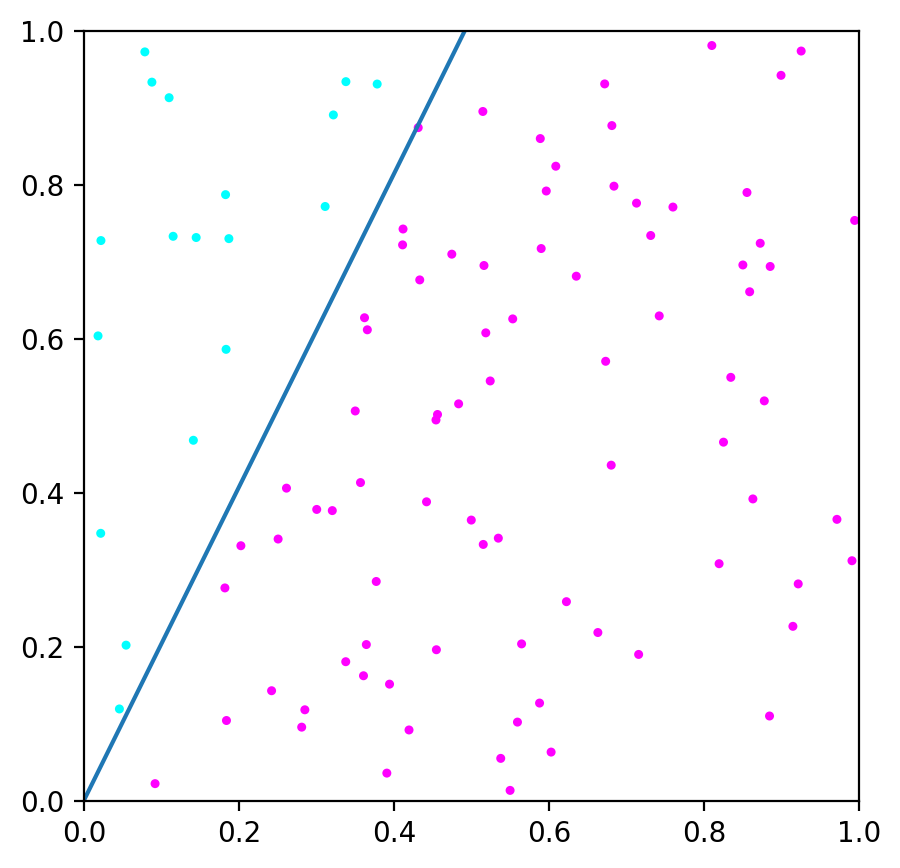

In [ ]:
# Plot the obtained decision boundary
slope, _ = get_dec_boundary(p.w)
plt.scatter(X[:,0], X[:,1], c=colors(Y), s=5)
plot_boundary(slope)
plt.show()

In [ ]:
# Examine the training error
error = p.err(X, Y)
print(f"Prediction error: {error}")

Prediction error: 0.0


/tmp/ipython-input-4214274590.py:20: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  return -float(w[0]/w[1]), 0.


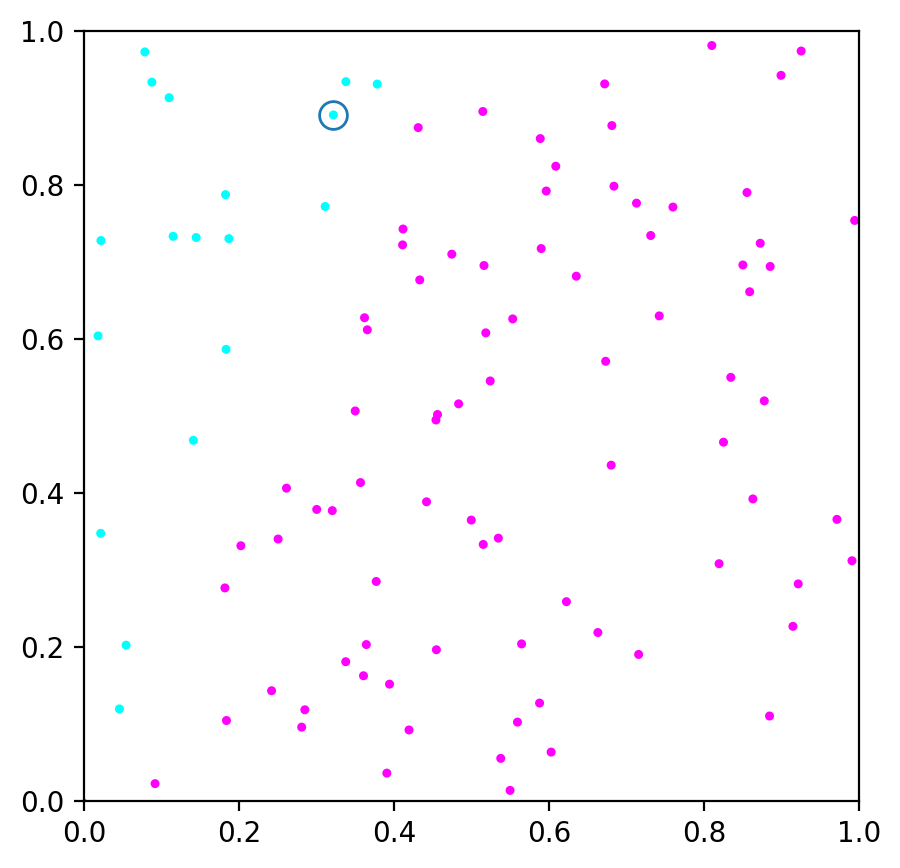

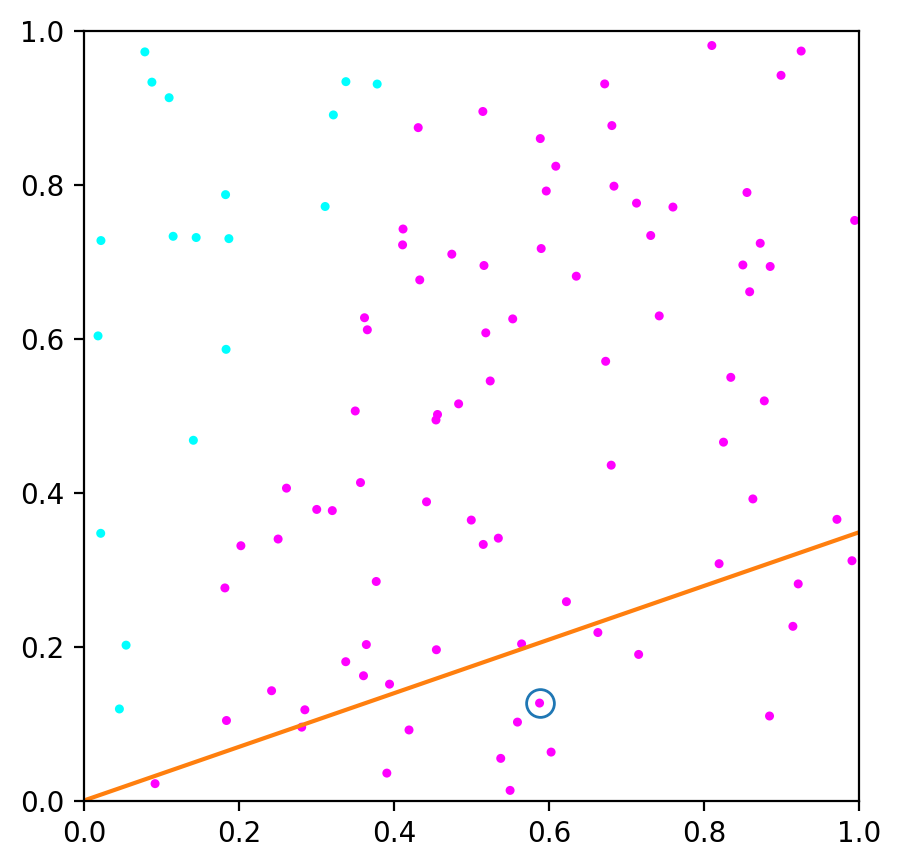

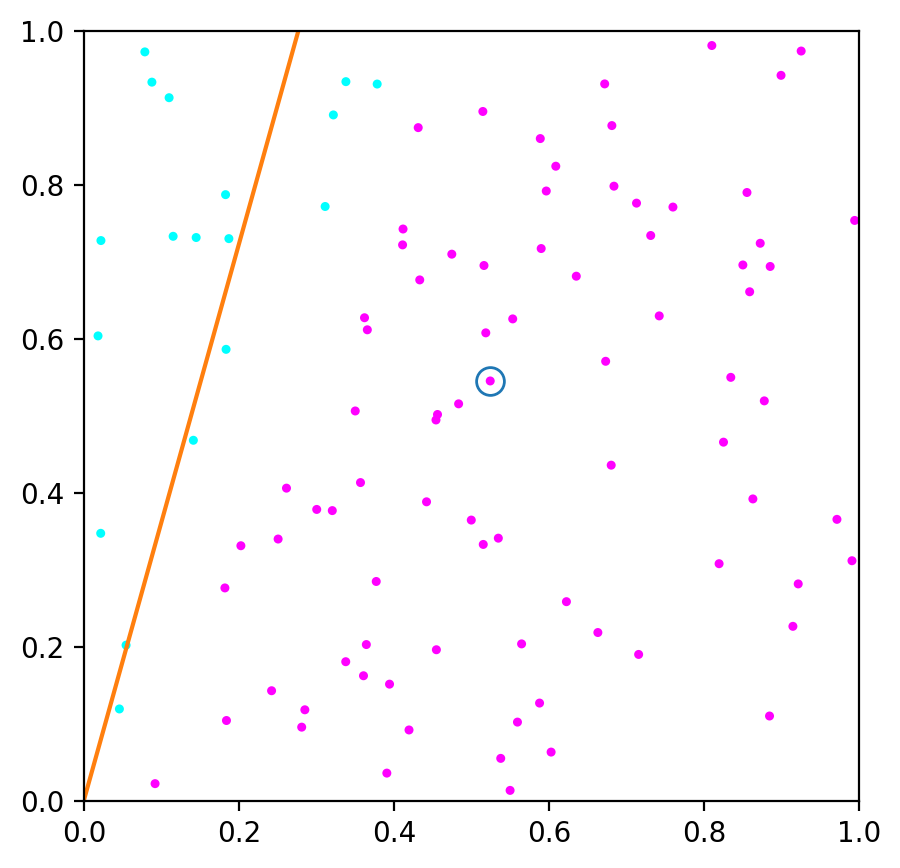

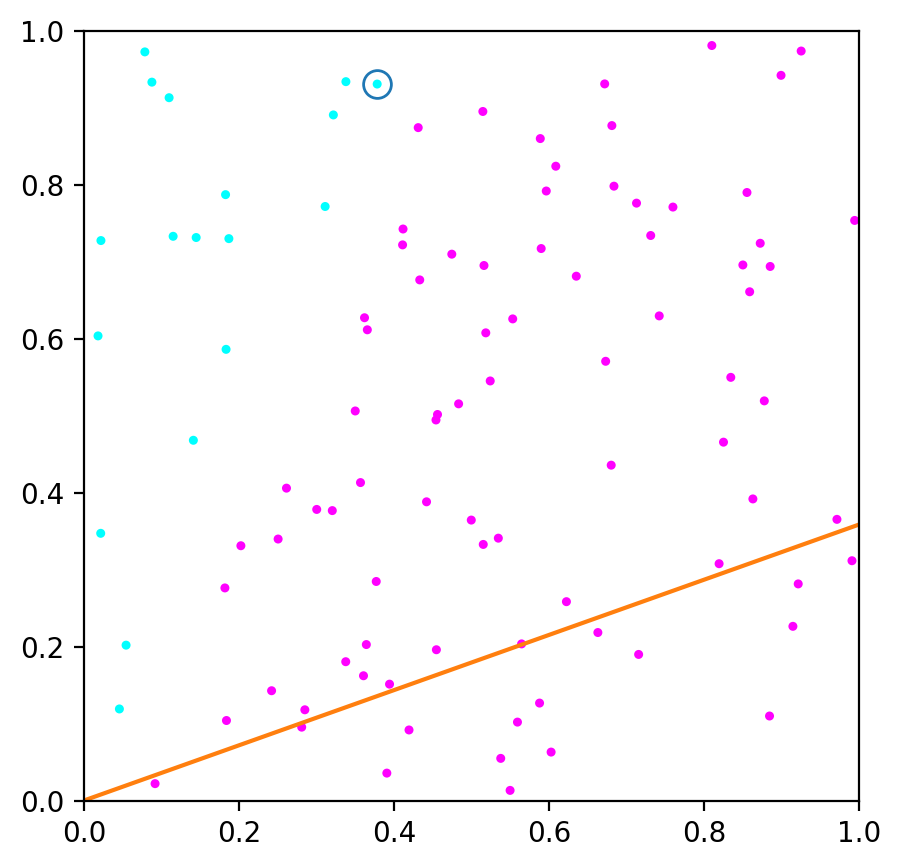

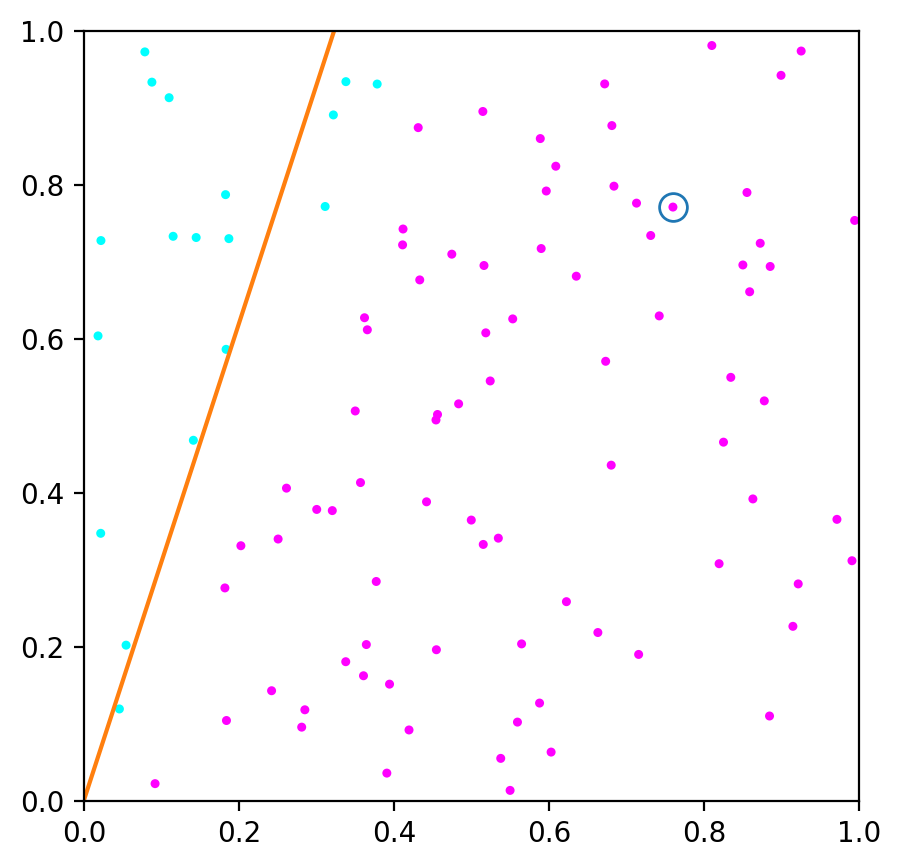

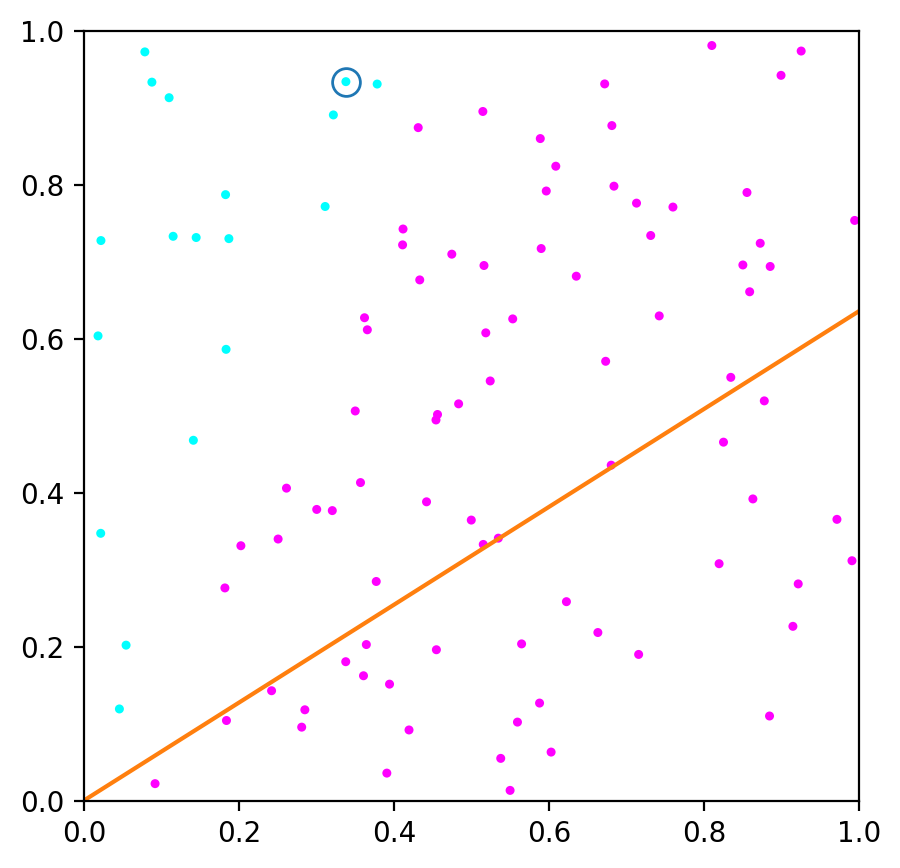

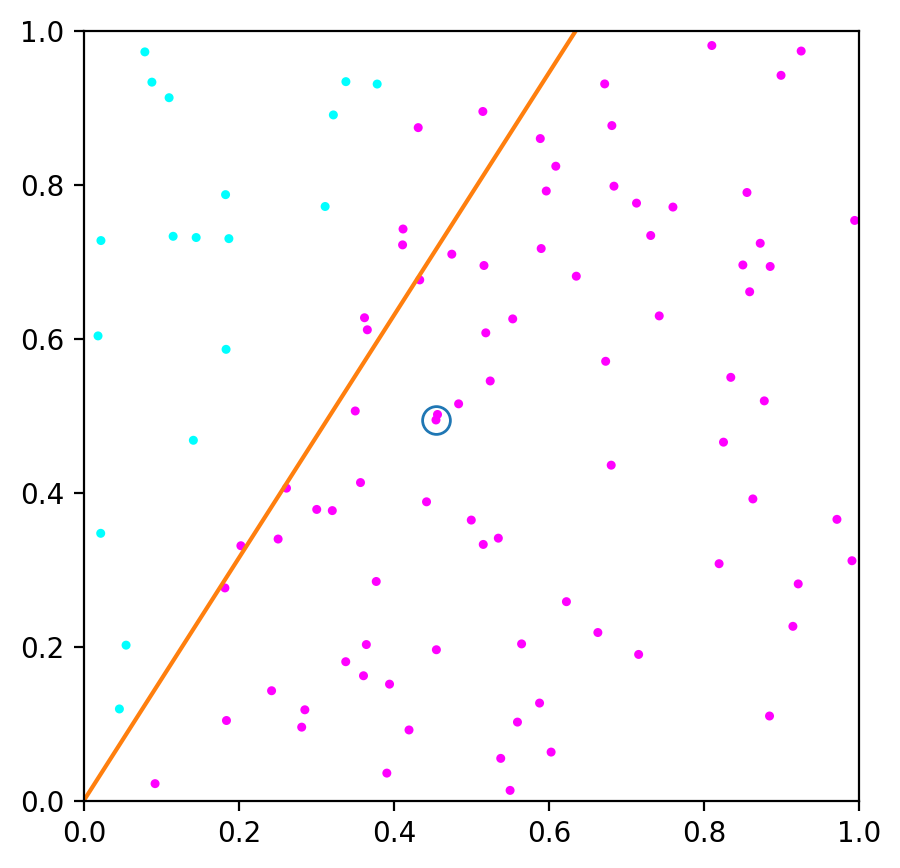

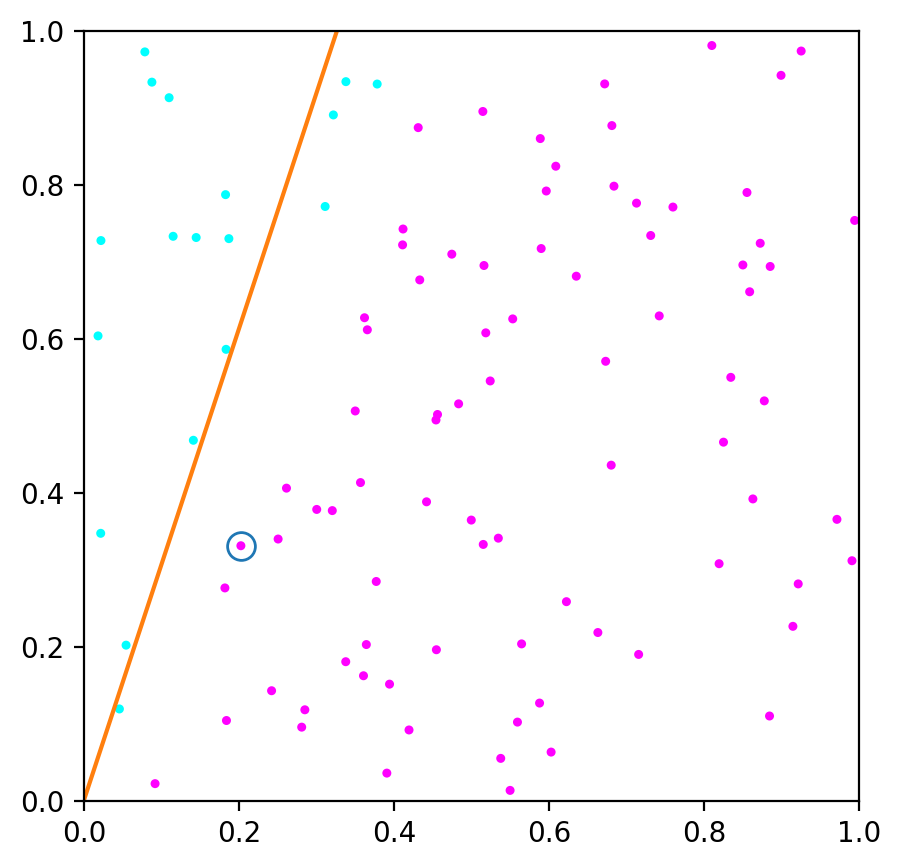

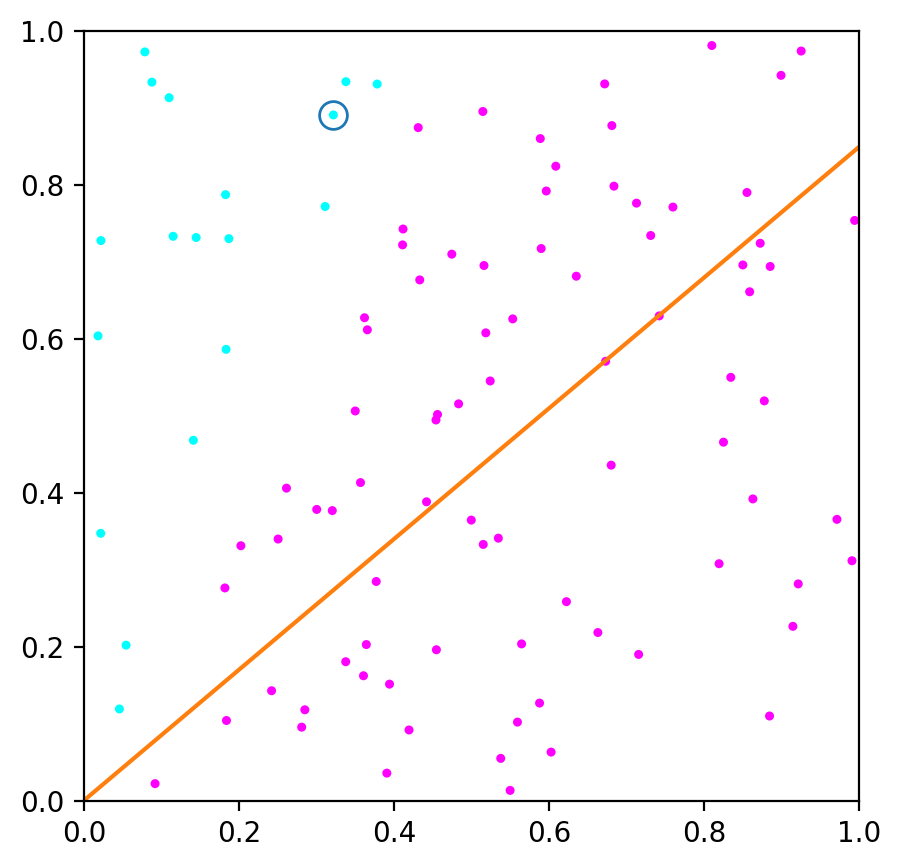

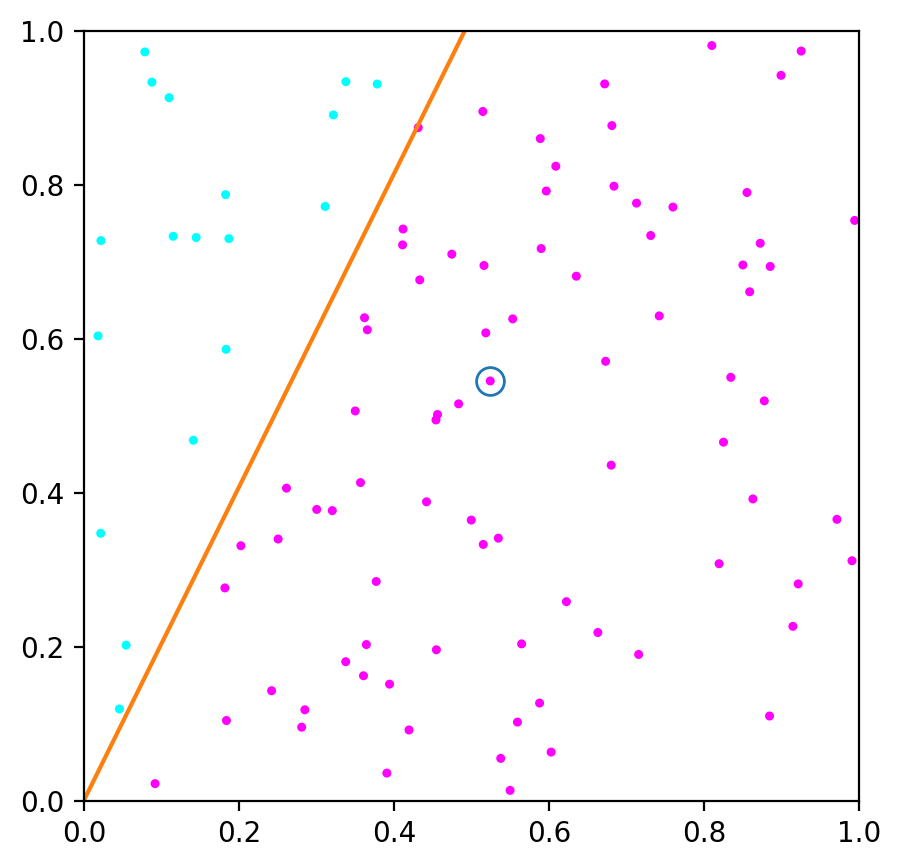

Converged!


In [ ]:
# Plot intermediate results during lab

p = Perceptron(100)
p.train(X, Y, plot=True, plot_period=1)

### Exercise:

How does changing the learning rate affect how long it takes for the perceptron algorithm to converge?

How does changing the order at which the perceptron algorithm sees the data points affect the convergence time?

In [ ]:
lrs= [0.1, 0.5, 1, 5, 10]

for lr in lrs:
    p = Perceptron(1000)
    p.train(X, Y, lr=lr, verbose=False)
    print(f"lr: {lr},\tNumber of updates till convergence: {p.num_updates}")

lr: 0.1,	Number of updates till convergence: 10
lr: 0.5,	Number of updates till convergence: 10
lr: 1,	Number of updates till convergence: 10
lr: 5,	Number of updates till convergence: 10
lr: 10,	Number of updates till convergence: 10


In [ ]:
np.random.seed(424)

for i in range(10):
    arr = np.arange(len(Y))
    np.random.shuffle(arr)
    Xnew, Ynew = X[arr], Y[arr]
    p = Perceptron(1000)
    p.train(Xnew, Ynew, verbose=False)
    print(f"Number of updates till convergence: {p.num_updates}")

Number of updates till convergence: 6
Number of updates till convergence: 10
Number of updates till convergence: 123
Number of updates till convergence: 8
Number of updates till convergence: 6
Number of updates till convergence: 8
Number of updates till convergence: 7
Number of updates till convergence: 12
Number of updates till convergence: 19
Number of updates till convergence: 7


### Discussion: Preceptron Model with Intercept

Now we consider the boundary between two classes to be $Xw+b=0$ where $b$ is the bias term.

We use the idea discussed in the lecture to expand $X$ to add a given dimension $(d+1)$ for which $X_{i,d+1} = 1$ for all $i$.

In [ ]:
# Generate dataset (Expanding X and update Y)

# true value of w and b used in generating the dataset
# W = [w0, w1, b]
# X = [X, 1]
b_true = -0.15 * np.ones((1, 1))
w_true_expand = np.concatenate([w_true, b_true], axis=0)

# expand X
X_expand = np.concatenate([X, np.ones((X.shape[0], 1))], axis=1)

# update Y
Y_update = np.sign(X_expand @ w_true_expand)

print(f"w_true_expand.shape: {w_true_expand.shape}")
print(f"X_expand.shape: {X_expand.shape}")
print(f"Y_update.shape: {Y_update.shape}")

w_true_expand.shape: (3, 1)
X_expand.shape: (100, 3)
Y_update.shape: (100, 1)


/tmp/ipython-input-4214274590.py:22: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  return -float(w[0]/w[1]), -float(w[2]/w[1])


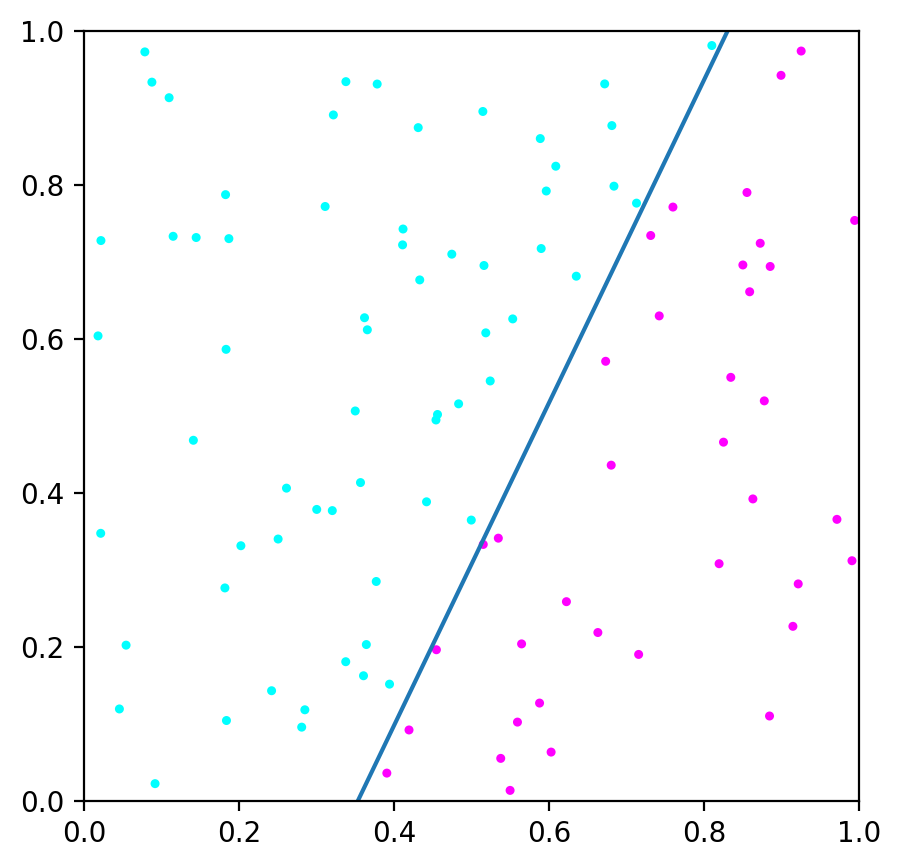

In [ ]:
# Plot the data and true decision boundary
true_slope, true_bias = get_dec_boundary(w_true_expand)
plt.scatter(X[:,0], X[:,1], c=colors(Y_update), s=5)
plot_boundary(true_slope, true_bias)

In [ ]:
class PerceptronIntercept(Perceptron):

    def __init__(self, iterations):
        self.w = np.zeros((3,1))
        self.iterations = iterations
        self.num_updates = 0

    ######################################
    # Update w using the preceptron algorithm:
    def train (
            self, X, Y, lr: float = 1.0, plot: bool = False, plot_period: int = 1, verbose: bool = True
    ) -> None:
        for itr in range(self.iterations):
            for i in range(len(X)):
              if X[i][0]*self.w[0][0]+X[i][1]*self.w[1][0]+X[i][2]*self.w[2][0] >0:
                if Y[i]!=1:
                  self.num_updates+=1
                  self.w[0][0]-=X[i][0]
                  self.w[1][0]-=X[i][1]
                  self.w[2][0]-=X[i][2]
              else:
                if Y[i]!=-1:
                  self.num_updates+=1
                  self.w[0][0]+=X[i][0]
                  self.w[1][0]+=X[i][1]
                  self.w[2][0]+=X[i][2]

            if self.err(X, Y) == 0:
                if verbose:
                    print(f"Converged!")
                break

In [ ]:
# Instantiate the Perceptron model with intercept and train it
p = PerceptronIntercept(1500)
p.train(X_expand, Y_update)

Converged!


/tmp/ipython-input-4214274590.py:22: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  return -float(w[0]/w[1]), -float(w[2]/w[1])


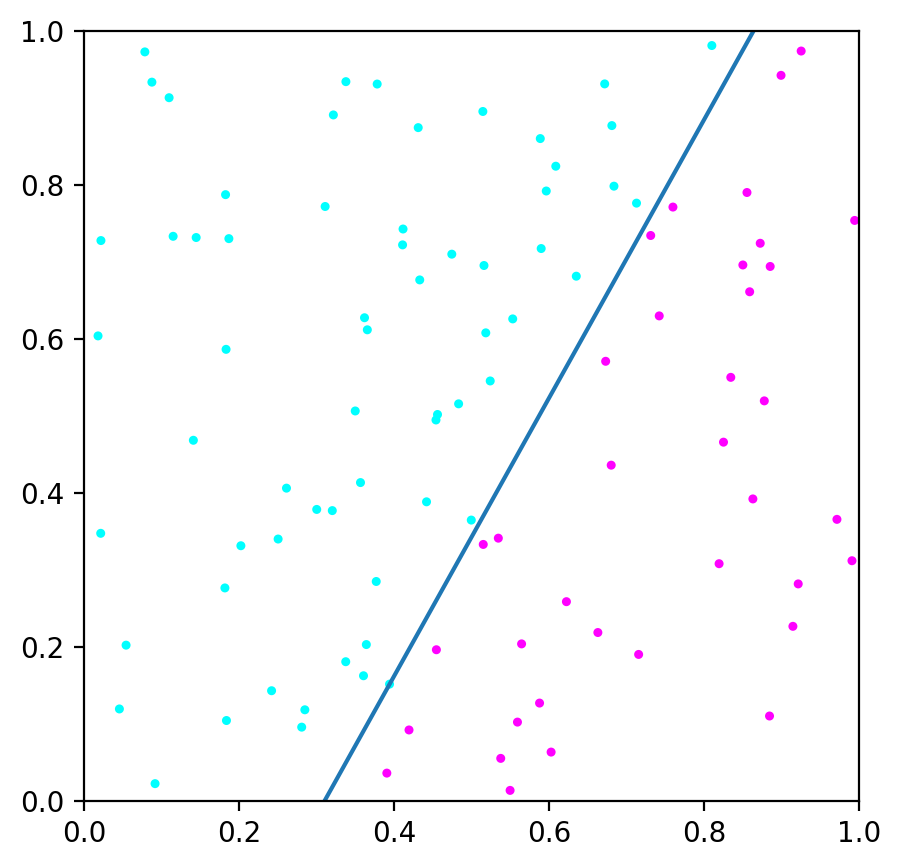

In [ ]:
plt.scatter(X_expand[:, 0], X_expand[:, 1], c=colors(Y_update), s=5)
slope, bias = get_dec_boundary(p.w)
plot_boundary(slope, bias)
plt.show()

In [ ]:
# Examine the training error
p.err(X_expand, Y_update)